# **Cars4U Price Prediction Model**

### **Business Overview**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past,the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this market. 

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind,the pricing scheme of these used cars becomes important in order to grow in the market.

### **Our Objective**
Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

### **Data Dictionary**

* S.No. : Serial Number
* Name : Name of the car which includes Brand name and Model name
* Location : The location in which the car is being sold or is available for purchase (Cities)
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM
* Fuel_Type : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car (Automatic / Manual)
* Owner : Type of ownership
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC
* Power : The maximum power of the engine in bhp
* Seats : The number of seats in the car
* New_Price : The price of a new car of the same model in INR 100,000
* Price : The price of the used car in INR 100,000 (Target Variable)

## **Data Inspection**

In [1]:
# Load the necessary libraries

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('used_cars.csv')

# loading the dataframe will give us both the df.head() & df.tail() results.

df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


#### Observations
- None of the first eight columns (from 'S.No' until 'Owner_Type') have null values, however the next 6 columns do with 'New Price being mostly comprised of null values.
- We have 7253 entries and 14 columns within our dataset.
- We have 3 integer columns, 6 float columns, and 5 object columns withing our dataset.

#### **Manually Check for Outliers in DataFrame**

If it become apparent during Exploratory Data Analysis that values certain values of the numeric columns are outliers, we will get remove them from the dataframe as to unsure the best possible metrics for thge model.

In [4]:
df.sort_values('Kilometers_Driven')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
1361,1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.70,796.0,47.30,5.0,NaN,3.60
5606,5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,6.80,6.25
1198,1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78,999.0,75.00,5.0,6.74,5.68
5941,5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17,799.0,53.30,5.0,4.45,3.40
6201,6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.70,796.0,47.30,5.0,3.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50


In [5]:
df.sort_values('Price')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
1713,1713,Tata Nano Lx,Pune,2011,65000,Petrol,Manual,Second,26.00,624.0,35.0,4.0,NaN,0.44
2847,2847,Hyundai Getz GLS,Pune,2005,86000,Petrol,Manual,Second,15.30,1341.0,83.0,5.0,NaN,0.45
1628,1628,Maruti 800 Std BSIII,Jaipur,2004,12000,Petrol,Manual,Second,16.10,796.0,37.0,4.0,NaN,0.45
3138,3138,Maruti Zen LXI,Jaipur,1998,95150,Petrol,Manual,Third,17.30,993.0,60.0,5.0,NaN,0.45
3228,3228,Maruti 800 Std,Pune,2003,52000,Petrol,Manual,First,16.10,796.0,37.0,4.0,NaN,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN


In [6]:
df.sort_values('Mileage')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.12
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.00,999.0,NaN,5.0,NaN,2.30
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.85
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.00,1968.0,NaN,5.0,NaN,5.45
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.00,2179.0,115.00,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,5.35,3.25
2059,2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,3.05
2371,2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,3.90
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.00,5.0,13.58,13.00


In [7]:
df.sort_values('Power')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
3321,3321,Maruti Omni MPI STD BSIV,Jaipur,2012,126000,Petrol,Manual,First,16.80,796.0,34.2,5.0,NaN,1.60
6226,6226,Maruti Omni E 8 Str STD,Bangalore,2005,81245,Petrol,Manual,Fourth & Above,16.80,796.0,34.2,8.0,NaN,NaN
2196,2196,Maruti Omni MPI STD BSIV,Coimbatore,2017,15473,Petrol,Manual,First,16.80,796.0,34.2,5.0,NaN,3.58
6408,6408,Maruti Omni MPI CARGO BSIV,Pune,2013,153000,Petrol,Manual,First,16.80,796.0,34.2,5.0,NaN,NaN
790,790,Maruti Omni E 8 Str STD,Hyderabad,2013,26875,Petrol,Manual,First,16.80,796.0,34.2,8.0,NaN,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN
6902,6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,NaN,NaN,NaN,NaN,NaN
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,NaN,NaN


In [8]:
# removing row 2328, as it is impossible.
df.drop(index=2328, inplace=True)

# removing rows where mileage = 0, as they are impossible
df.drop(df[df['Mileage'] == 0].index, inplace=True)

In [9]:
# Check for unique values within individual columns

def print_unique_values(df):
    """
    The purpose of this function is to give you the number of unique values
    within each individual column of the dataframe. The function uses a for-loop
    to print the name of each column, followed by the number of unique values within said column.
    It separates the line in between each column and its unique values to make inspection easier for
    the analyst and other readers.
    """
    
    for col in df.columns: 
        unique_values = df[col].unique()
        print(f"Column: {col}") 
        print(f"Number of Unique Values: {len(unique_values)}\n")

print("Answer to question #2: \n")
print_unique_values(df)

Answer to question #2: 

Column: S.No.
Number of Unique Values: 7171

Column: Name
Number of Unique Values: 2006

Column: Location
Number of Unique Values: 11

Column: Year
Number of Unique Values: 23

Column: Kilometers_Driven
Number of Unique Values: 3629

Column: Fuel_Type
Number of Unique Values: 5

Column: Transmission
Number of Unique Values: 2

Column: Owner_Type
Number of Unique Values: 4

Column: Mileage
Number of Unique Values: 438

Column: Engine
Number of Unique Values: 149

Column: Power
Number of Unique Values: 382

Column: Seats
Number of Unique Values: 9

Column: New_price
Number of Unique Values: 623

Column: Price
Number of Unique Values: 1364



In [10]:
# Get a percentage of the missing data for each column

round(df.isnull().sum() / df.shape[0] * 100, 2)

S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.47
Power                 1.81
Seats                 0.54
New_price            86.03
Price                17.03
dtype: float64

The ***'New_price'*** column will be dropped as over 86% of it is null values, over half of which are unique. It will not add value to the analysis or to the model. The ***'S.No.'*** column will also be dropped as it entirely consists of null values.

NaN values will be dropped from the entire dataframe as opposed substituting them for metric values as to ensure reproducibility during the deployment stage.

In [11]:
df.drop(columns=['S.No.', 'New_price'], inplace=True)
df.dropna(inplace=True)

In [12]:
print("Answer to question #1: \n")
df.describe()

Answer to question #1: 



,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,2013.480404,57224.501284,18.365822,1622.600034,113.114819,5.285128,9.536024
std,3.163482,37773.045190,4.188521,598.772591,53.783427,0.806828,11.164542
min,1998.000000,171.000000,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,33490.500000,15.300000,1198.000000,75.000000,5.000000,3.515000
50%,2014.000000,52553.000000,18.330000,1495.000000,94.680000,5.000000,5.700000
75%,2016.000000,72405.500000,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,775000.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


#### Observations
- The 'S.No.' column, as expected, consists entirely of unique values and should be dropped for the model.
- 'Price' metrics are all at least 50% lower than 'New_Price' metrics

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Define graphing functions

def histogram_boxplot(
    data, 
    feature, 
    figsize=(12, 7), 
    kde=False, 
    bins=None
):
    """
Boxplot and histogram combined

data: datafram
feature: dataframe column
figsize: size of figure (deafault (12,7))
kde: showing the density curve (default False)
bins: number of bins for a histogram (default none)
"""
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )  # Add median to the histogram

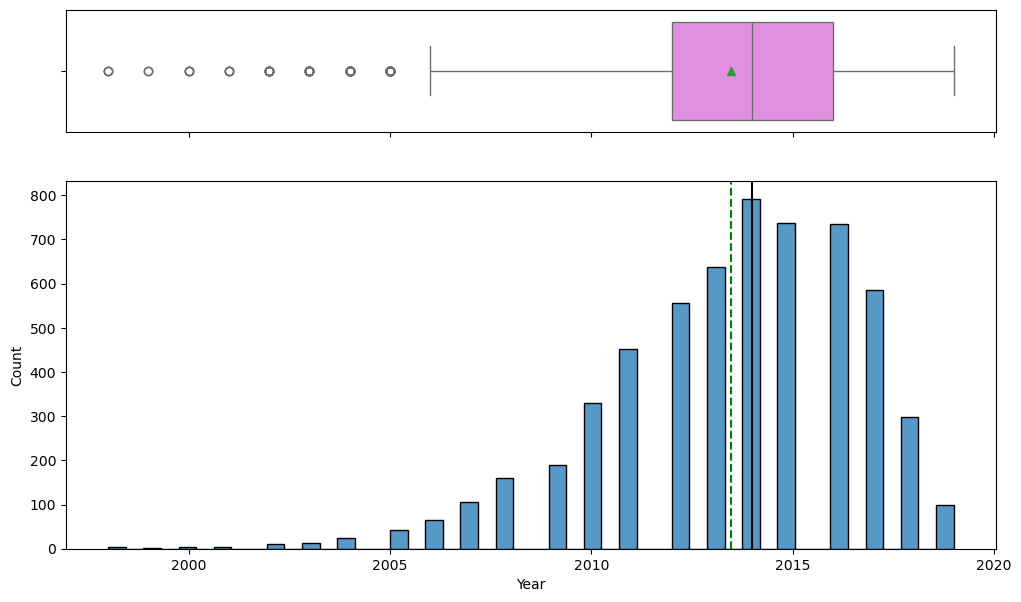

In [15]:
histogram_boxplot(
    data=df, 
    feature='Year'
)

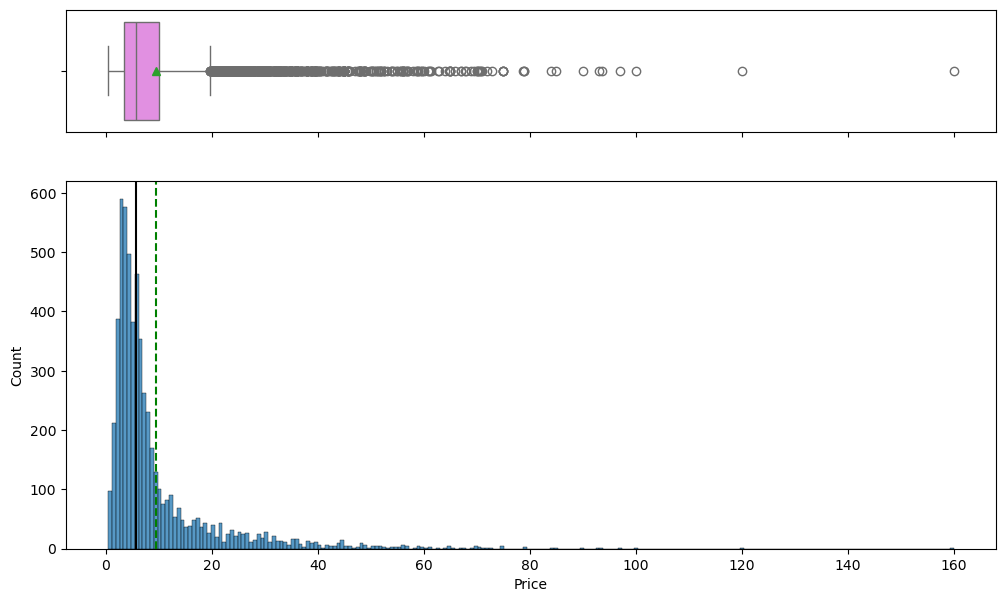

In [16]:
histogram_boxplot(
    data=df, 
    feature='Price'
)

<Axes: xlabel='Price_log', ylabel='Count'>

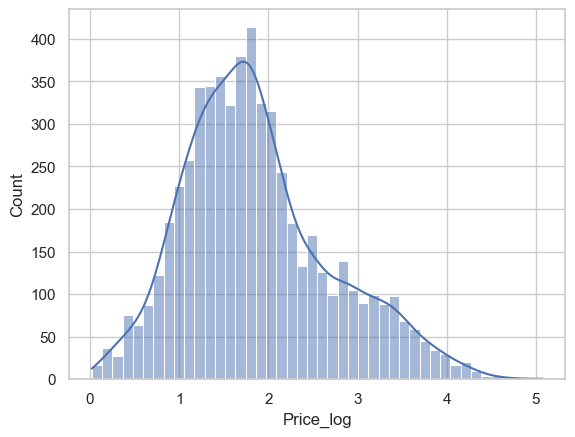

In [17]:
# Use log of Price variable
df['Price_log'] = np.log(df['Price'])

# Filter out negative values
df = df[df['Price_log'] > 0]

sns.set(style='whitegrid')

sns.histplot(
    data=df, 
    x='Price_log', 
    kde=True
)

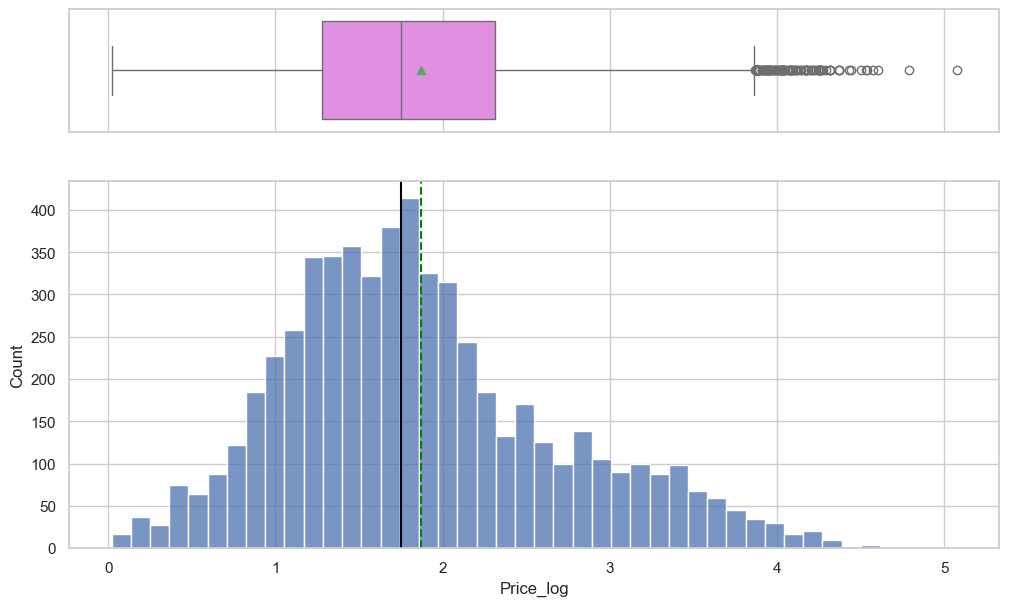

In [18]:
histogram_boxplot(
    data=df, 
    feature='Price_log'
)

The 'Price' Variable was very right-skewed, so we will use the log of the 'Price' variable as the target variable for the model, as it is much closer to normal distribution. Negative values for the target variable had to be filtered out, as price cannot be negative or 0.

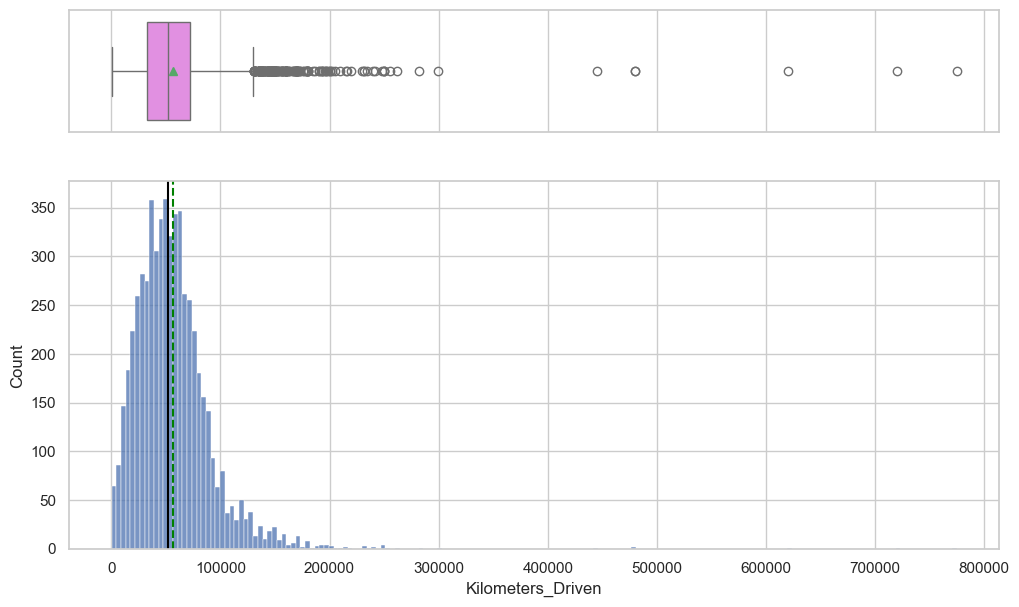

In [19]:
histogram_boxplot(
    data=df, 
    feature='Kilometers_Driven'
)

In [20]:
df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'])

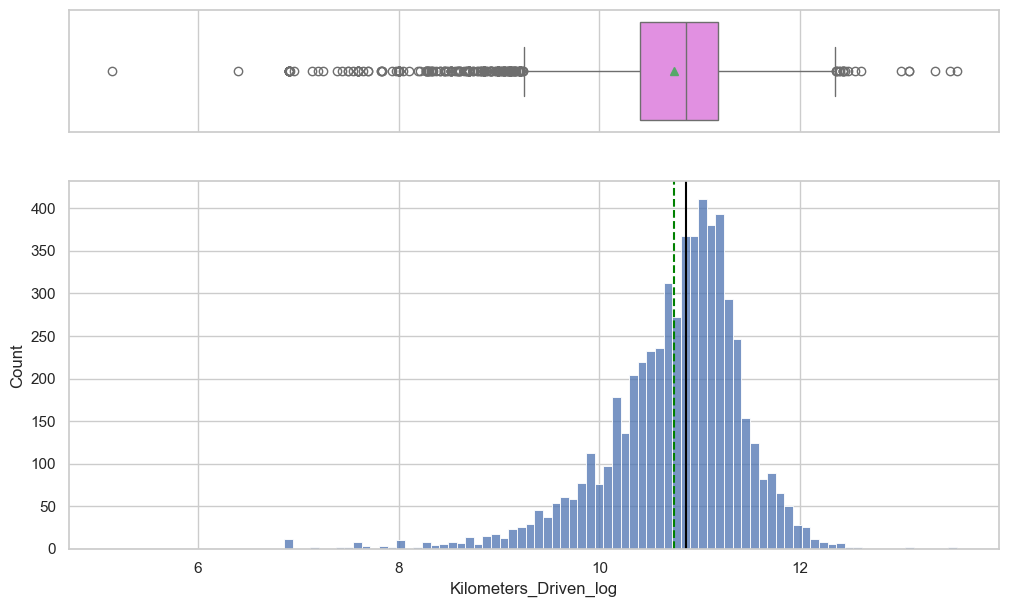

In [21]:
histogram_boxplot(
    data=df, 
    feature='Kilometers_Driven_log'
)

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [22]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

# Drop the 'Name' column as it is no longer necessary
df.drop(columns=["Name"], inplace=True)

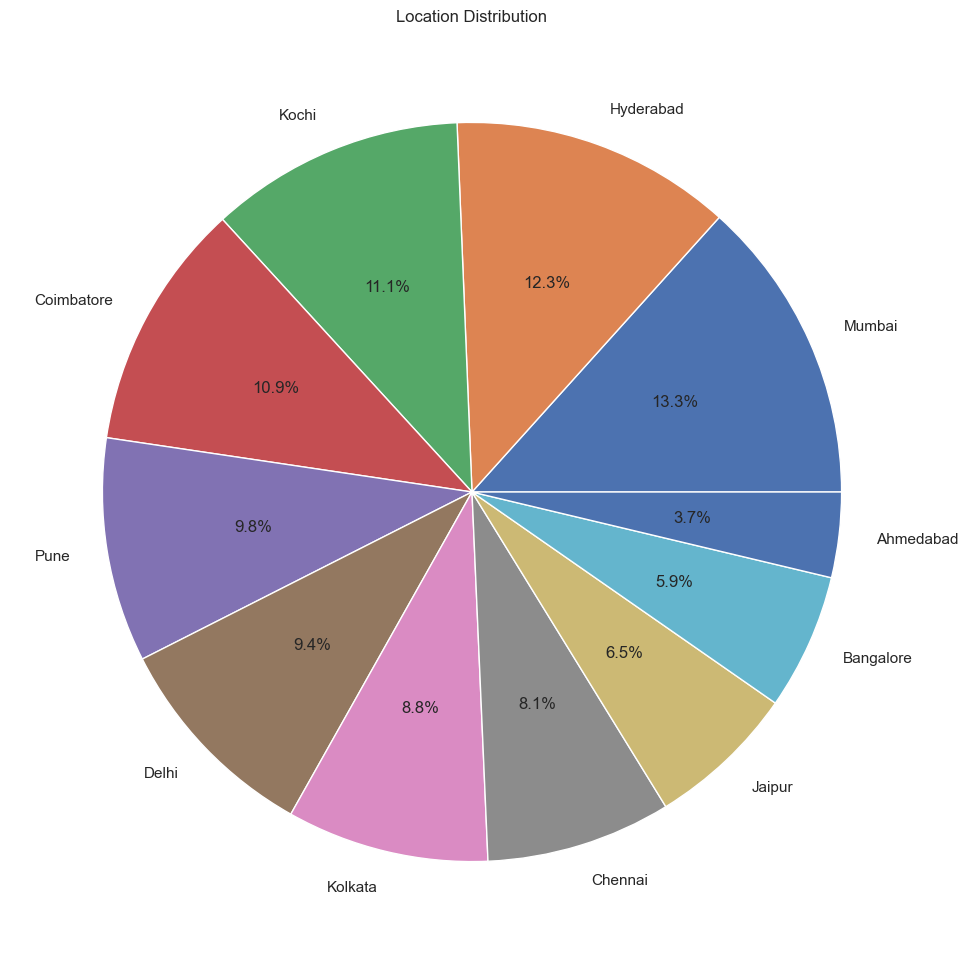

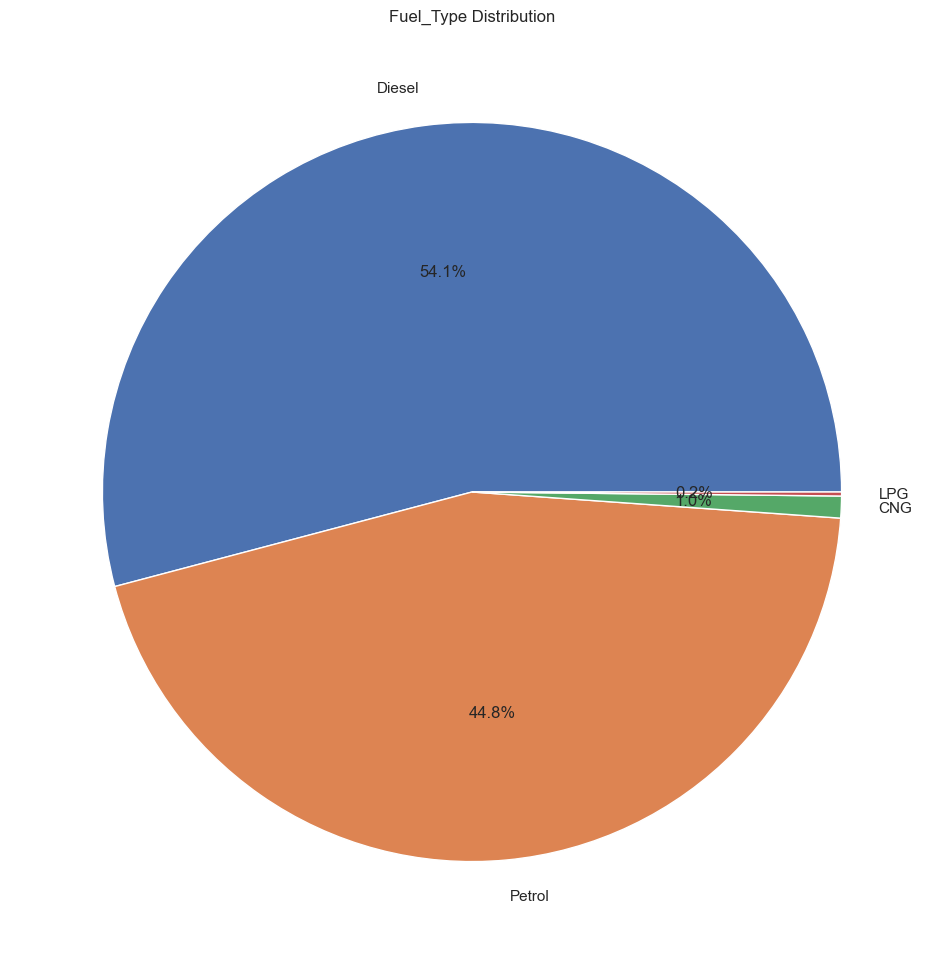

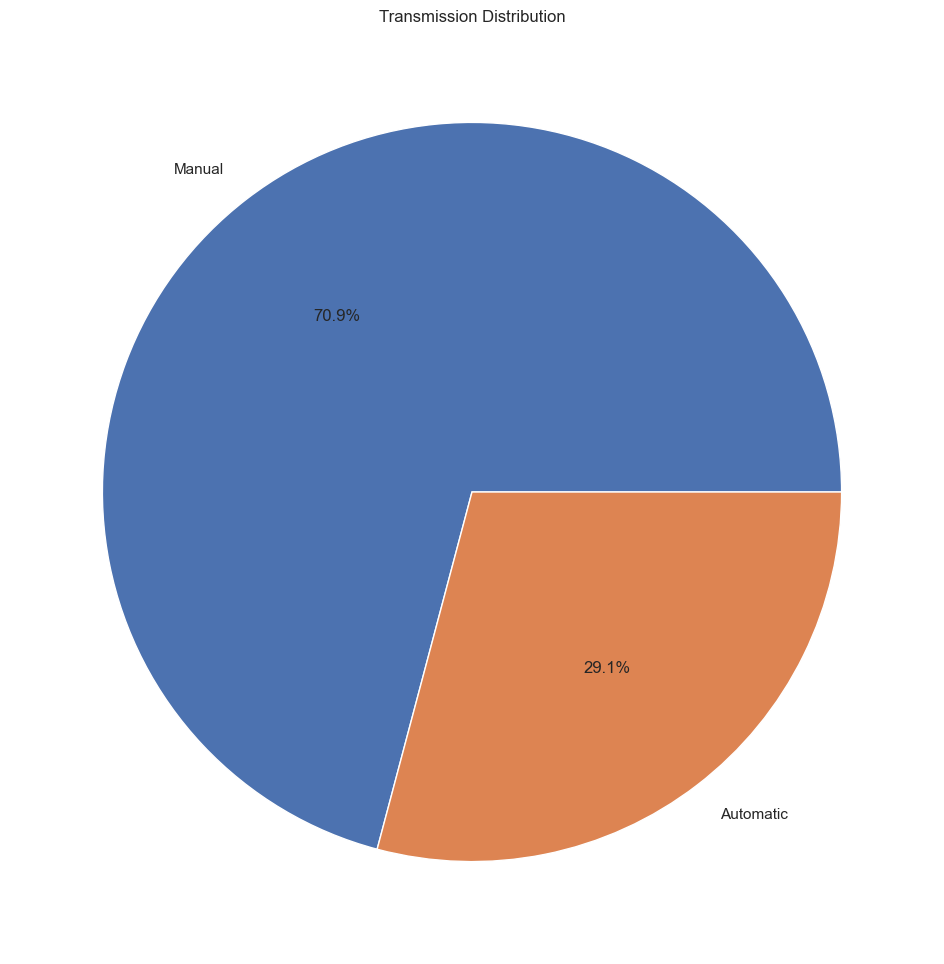

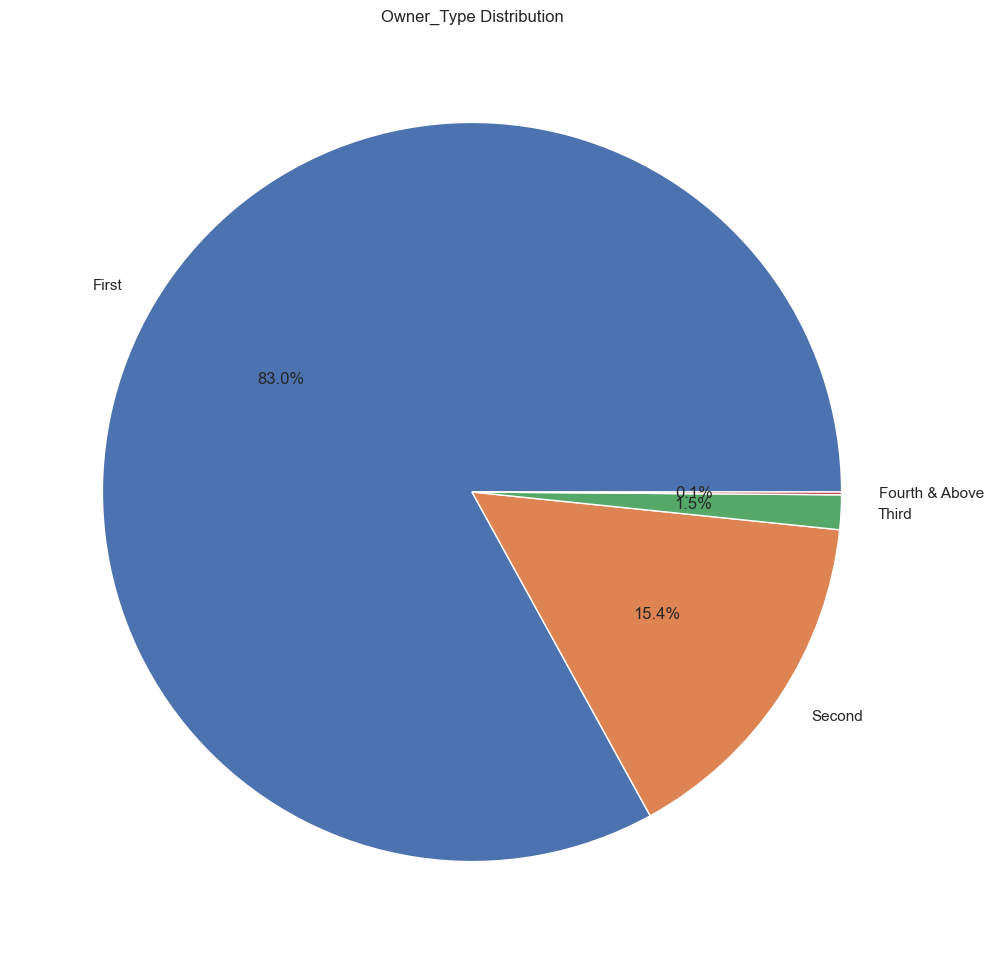

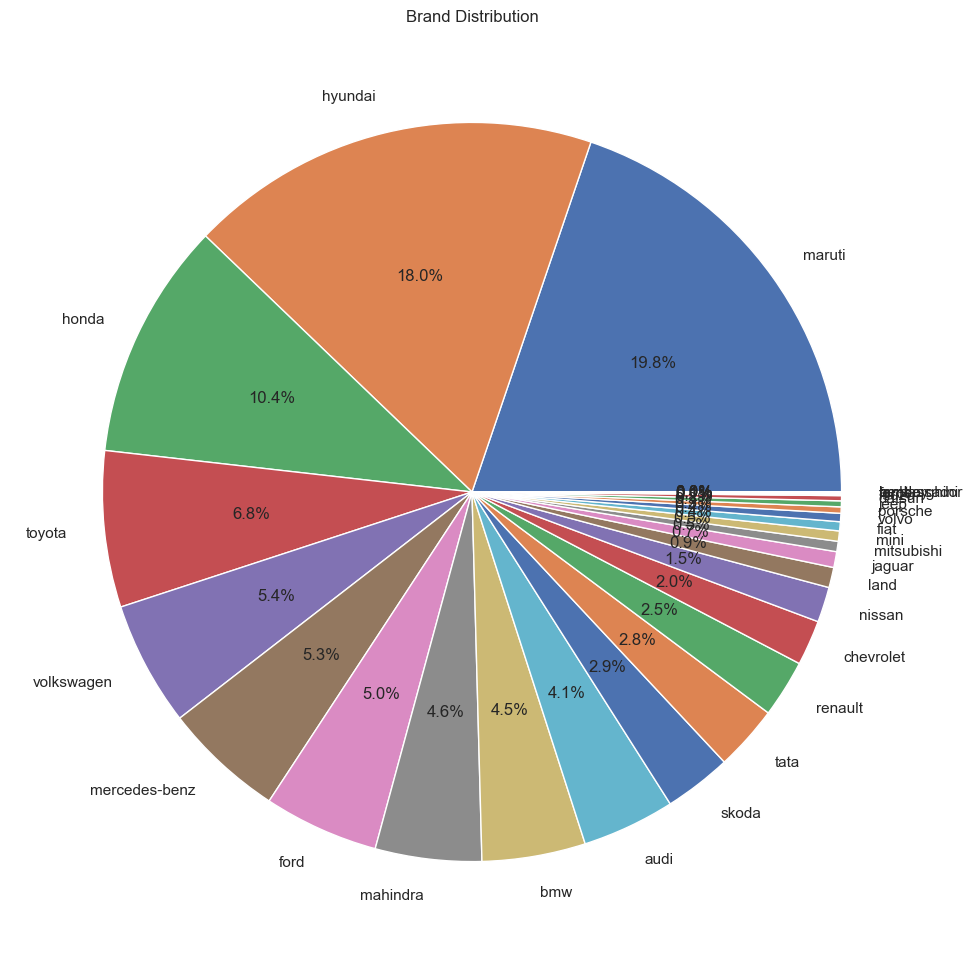

In [23]:
# pie charts for categorical variables

for col in df.select_dtypes(include=['object']).columns:
        df[col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(12, 12))
        plt.title(f'{col} Distribution')
        plt.ylabel('')
        plt.show()

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

In [24]:
# Check and confirm all independent variable correlation to target variable

from scipy.stats import pearsonr

def variables_target_corr(df):
    """ 
    Function's purpose is to check the correlation between each column and the target variable.
    Analyst will set both target_var and dirsregarded_var values.
    """
    target_var = 'Price'
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != target_var:
                corr, _ = pearsonr(df[col], df[target_var])
                print(f"The correlation between {col} and {target_var} is {corr:.2f}.")

In [25]:
variables_target_corr(df)

The correlation between Year and Price is 0.29.
The correlation between Kilometers_Driven and Price is -0.16.
The correlation between Mileage and Price is -0.34.
The correlation between Engine and Price is 0.66.
The correlation between Power and Price is 0.77.
The correlation between Seats and Price is 0.05.
The correlation between Price_log and Price is 0.87.
The correlation between Kilometers_Driven_log and Price is -0.18.


In [26]:
def multiplot(
    data, 
    x, 
    y, 
    kind='line', 
    hue=None, 
    figsize=(12, 7)
):
    """
    Plot two features (x and y) from a DataFrame on the same graph.

    Parameters:
    * data: Pandas DataFrame containing the data.
    * x: Column name for the x-axis (str-value)
    * y: Column name for the y-axis (str-value)
    * kind: Type of plot ('line', 'scatter', or 'hist'). Default is 'line'.
    * hue (optional): Default is none. Hue will be based on y variable.
    * figsize: Figure size, default is (12, 7).
    """
    # Seaborn style
    sns.set(style='whitegrid')
    sns.set_palette('coolwarm')

    # Create a new figure with the specified size
    plt.figure(figsize=figsize)

    # Plot based on the kind of plot specified
    if kind == 'line':
        sns.lineplot(data=df, x=x, y=y, hue=hue, palette='coolwarm')
    elif kind == 'scatter':
        sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='coolwarm')
    elif kind == 'hist':
        sns.histplot(data=df, x=x, hue=hue, kde=True, palette='coolwarm')
    else:
        raise ValueError("Unsupported plot kind. Use 'line', 'scatter', or 'hist'.")

    # Add labels, title, and legend
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Plot of {x} and {y} with Hue: {hue}")
    plt.legend(title=f"Hue: {hue}")

    # Display the plot
    plt.show()

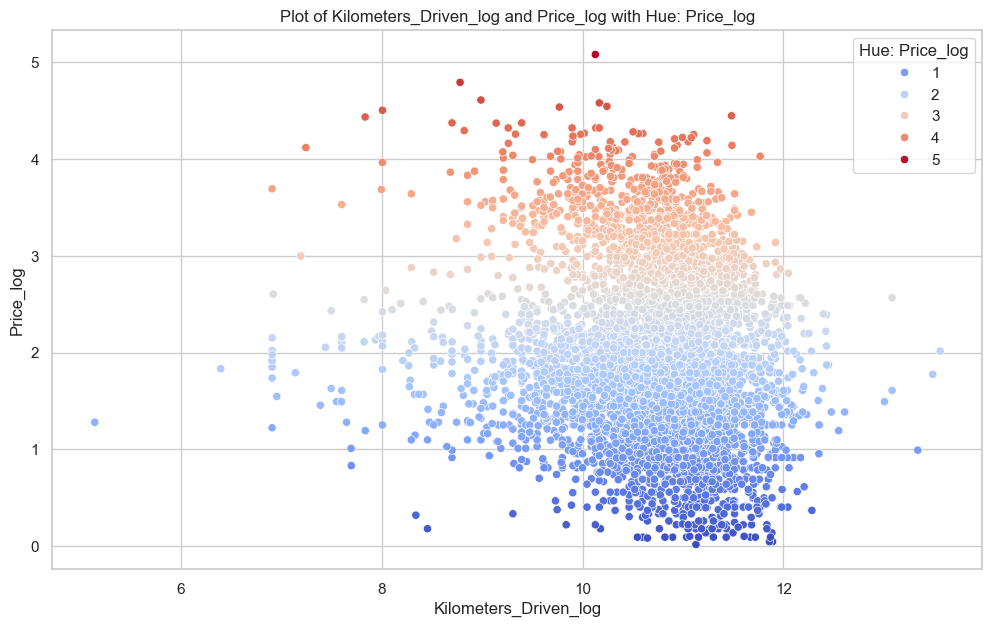

In [27]:
multiplot(
    data=df, 
    x='Kilometers_Driven_log', 
    y='Price_log', 
    kind='scatter',
    hue='Price_log'
)

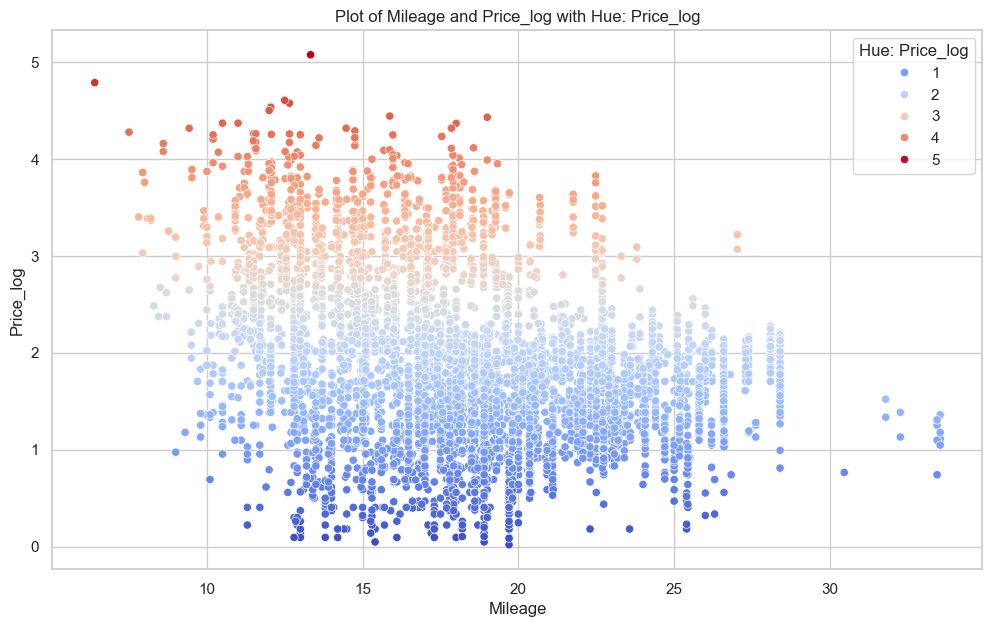

In [28]:
multiplot(
    data=df, 
    x='Mileage', 
    y='Price_log', 
    kind='scatter',
    hue='Price_log'
)

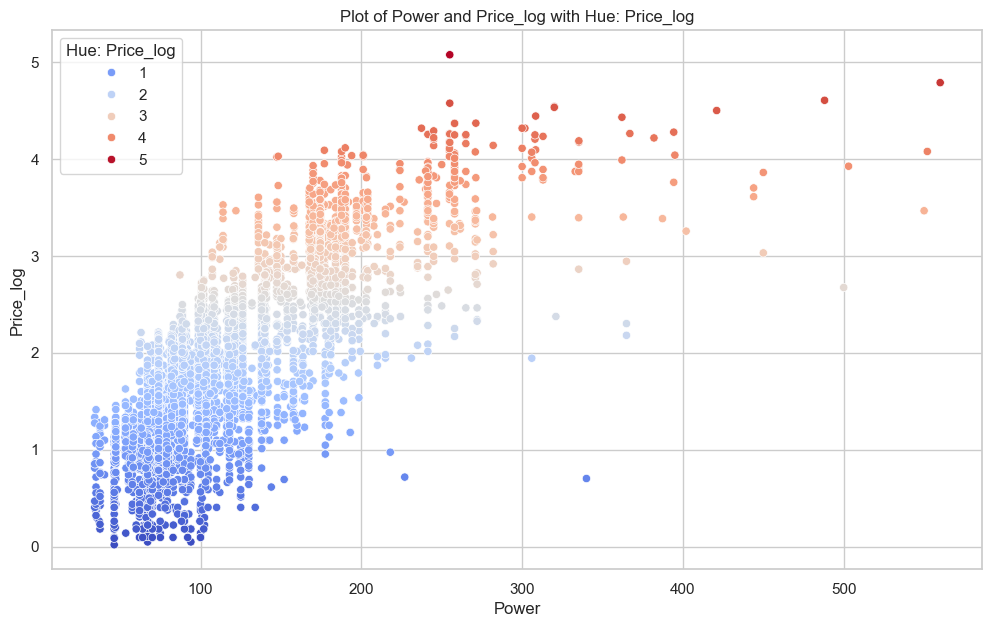

In [29]:
multiplot(
    data=df, 
    x='Power', 
    y='Price_log', 
    kind='scatter',
    hue='Price_log'
)

<Axes: >

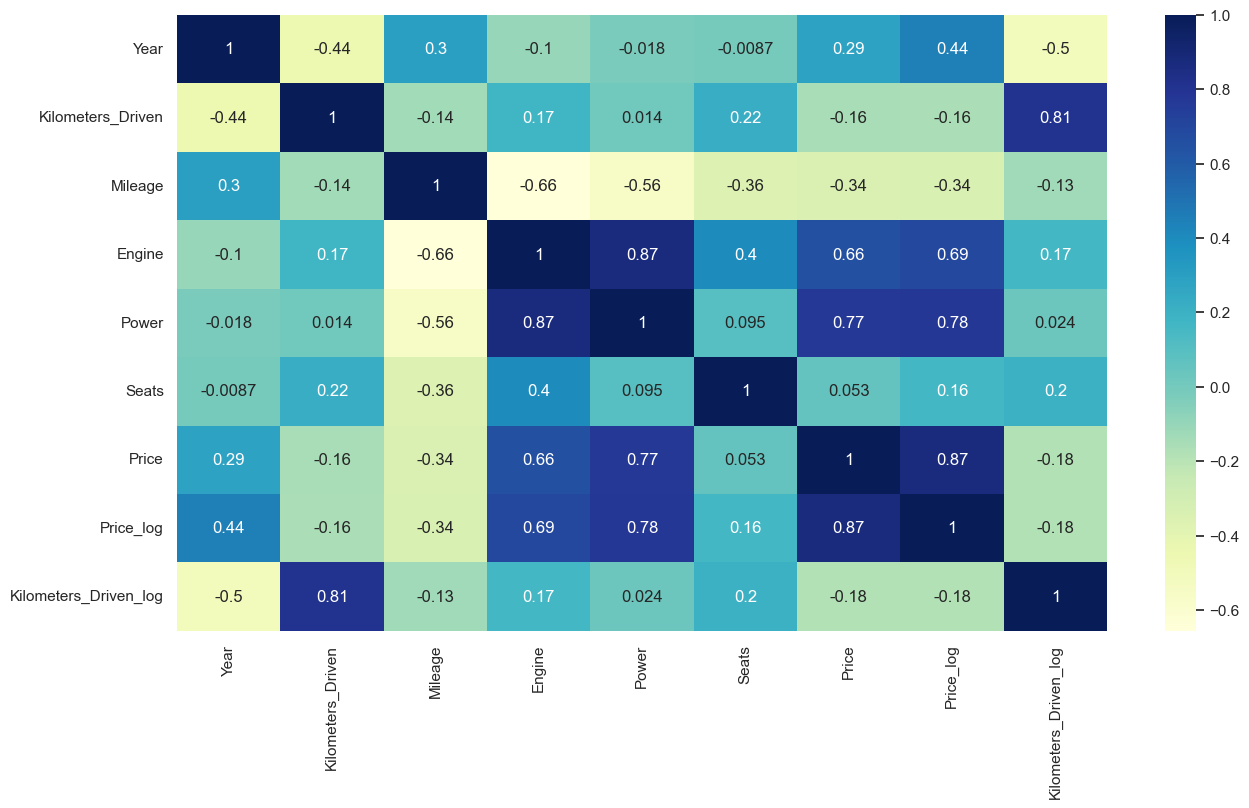

In [30]:
# HeatMap
plt.figure(figsize=(15,8))

sns.heatmap(
    df.select_dtypes(include=[float, int]).corr(),      # Only numeric data types selected for heatmap
    annot=True, 
    cmap='YlGnBu'
) 

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

- The **overwhelming majority** of the vehicles the company has sold have a manual transmission (70.9%).
- The **overwhelming majority** of the vehicles the company has sold have only had one previous owner (80.3%).
- Haruti and Hyundai are the main car brands
- Strong positive correlation between 'Engine' and 'Price_log'
- Strong positive correlation between 'Power' and 'Price_log'

In [31]:
# Import relevant Machine Learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.exceptions import NotFittedError

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### *Column Conversion*

Must be completed for column building with categorical columns. All categorical columns must be converted to numerical values to ensure optimal performance for each model.

In [32]:
# Define categorical and numerical columns
categorical_features = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
numerical_features = ['Year', 'Kilometers_Driven_log', 'Mileage', 'Engine', 'Power', 'Seats']

# Create a data preprocessing pipeline for scaling and encoding 
# still need to scale other features below
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # StandardScaler for numerical columns
        ('cat', OneHotEncoder(), categorical_features)  # OneHotEncoder for categorical columns
    ])


### *Data Splitting*

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

**Answer**

1. 'Name' will be dropped because it will be disruptive to the model's predictive abilities as it has too many unique values. 'Kilometers_Driven' will be dropped because it is too skewed. 'Price' and 'Price_log' will be dropped because they are meant to be target variables, however only 'Price_log' will serve as our target variable because 'Price' is too skewed.

In [33]:
# Set variables
X = df.drop(columns = {'Price', 'Price_log', 'Kilometers_Driven'}) # all columns besides target varibale


y = df['Price_log'] # target variable

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=42   # Random State set for model reproducibility
)

### *Data Scaling*

StandardScaler already set above

In [35]:
# Data preprocessing: Scale the features
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### *Hyperparameter Tuning: All Models*

Use pipeline method as well as GridSearchCV to make multiple models and apply cross-validation for each of them.

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
# Pipelines for each algorithm to loop through models

pipelines = {
    'LinReg': make_pipeline(LinearRegression()), # LinearRegression doesn't have random_state
    'RidgeReg':make_pipeline(Ridge(random_state=42)), # Set same random_state value from train-test split for reproducibility
    'LassoReg':make_pipeline(Lasso(random_state=42)),
    'DTree':make_pipeline(DecisionTreeRegressor(random_state=42)),
    'RFR':make_pipeline(RandomForestRegressor(random_state=42))
}

#### Get the Parameters for the Models

In [38]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [40]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [41]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [42]:
"""
Access different hyper-parameters within each algorithm.
This will be a dictionary value with the same key names as 
our pipeline.
"""

hypergrid = {
    'LinReg': {                                                           # Linear Regression
        'linearregression__fit_intercept': [True, False],
        'linearregression__positive': [True, False]
    },
    'RidgeReg': {                                                         # Ridge Regression                        
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'LassoReg': {                                                         # Lasso Regression
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'DTree': {                                                            # Decision Tree
         'decisiontreeregressor__min_samples_split': [2, 4, 6], 
         'decisiontreeregressor__min_samples_leaf': [1, 2, 3]
    },
    'RFR': {                                                              # Random Forest 
         'randomforestregressor__min_samples_split': [2, 4, 6], 
         'randomforestregressor__min_samples_leaf': [1, 2, 3]
    }
}

In [43]:
# Use GridSearchCV for hyper-parameter tuning

# Save algorithm(model) within dictionary
fit_models = {}

for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Beginning training for {}.'.format(algo))
        model.fit(X_train_scaled, y_train)             # train model
        fit_models[algo] = model
        print('{} has been fit.'.format(algo))
    except NotFittedError as e:                        # Error if model doesn't fit successfully
        print(repr(e))

Beginning training for LinReg.
LinReg has been fit.
Beginning training for RidgeReg.
RidgeReg has been fit.
Beginning training for LassoReg.
LassoReg has been fit.
Beginning training for DTree.
DTree has been fit.
Beginning training for RFR.
RFR has been fit.


In [44]:
# Testing predictions
fit_models['LinReg'].predict(X_test_scaled)

array([3.0746327 , 2.9947879 , 2.21524185, ..., 1.99946777, 0.49716879,
       1.43602919])

In [45]:
# Evaluation of the models
for algo, model in fit_models.items():  
    hyp = model.predict(X_test_scaled)
    print("{} scores -\nR2:{:.3f} MAE:{:.3f}\n".format(algo, r2_score(y_test, hyp), 
                                                    mean_absolute_error(y_test, hyp))) # Get R2 and MAE scores to 3 decimal places


LinReg scores -
R2:0.919 MAE:0.180

RidgeReg scores -
R2:0.919 MAE:0.180

LassoReg scores -
R2:0.914 MAE:0.184

DTree scores -
R2:0.879 MAE:0.191

RFR scores -
R2:0.939 MAE:0.145



### *Visualizing Results*

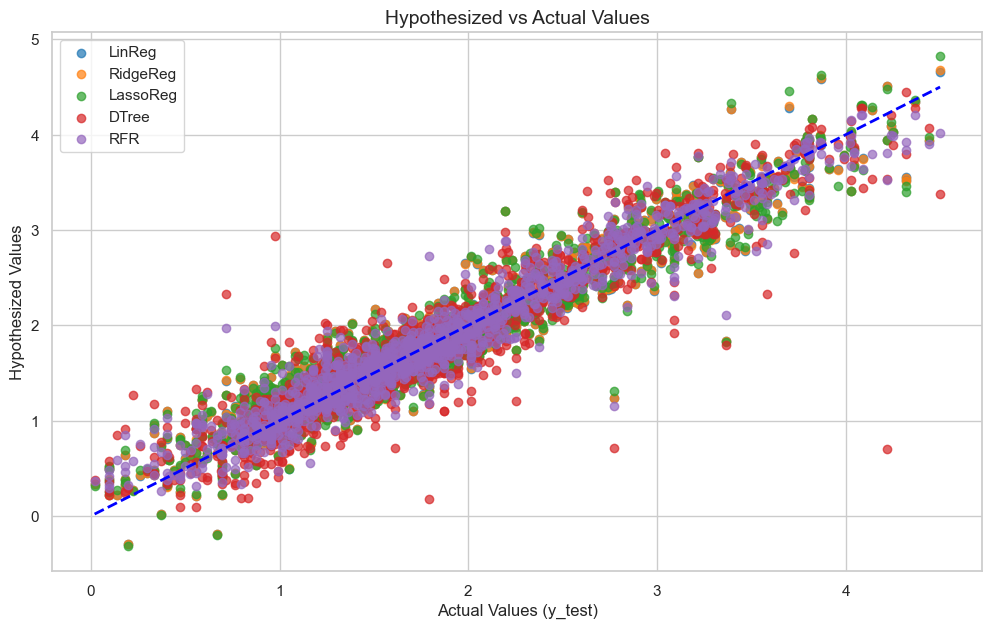

In [46]:
# Define a color map (Best to use qualitative colorway)
colors = plt.get_cmap('tab10')

plt.figure(figsize=(12, 7))

# Use for-loop for to assign each model a diffrent color
for i, (algo, model) in enumerate(fit_models.items()):
    hyp = model.predict(X_test_scaled)
    plt.scatter(y_test, hyp, label=algo, color=colors(i), alpha=0.7)

# Ideal line 
plt.plot(
    [min(y_test), 
     max(y_test)], 
    [min(y_test), 
     max(y_test)], 
    color='blue', 
    linestyle='--', 
    linewidth=2
)

# Labels and Title
plt.title('Hypothesized vs Actual Values', fontsize=14)
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Hypothesized Values', fontsize=12)

# Display
plt.legend()
plt.show()


## **Conclusions and Recommendations**

-  The metrics for each model are ***VERY GOOD***. The best model is the RandomForestRegresssor, as it has the highest R2 and the lowest mean absolute error.
-  The Random Forest model will provide the most accurate predictions for used car prices, however the linear regression and ridge regression models would also perform well and are still usable as backup models.
-  The Random Forest model is great at handling non-linear interactions between variables. As we know, life is non-linear. The model can also handle a large number of features and ranks their importance, providing business insights for different pricing strategies.
-  The model can account for almost 94% of variance in used car prices and also minimizes the difference between predicted and actual prices.
-  As you can see from the above graph, the Random Forest model values take up the majority of the are on or near the ideal line.

All this being said, **the Random Forest model is the best model to be adopted.**

## **Deployment** 

Will be completed in a separate Python file.